In [1]:
import numpy as np #data계산을 위한 모듈
import pandas as pd #data 로드를 위한 모듈
from sklearn.model_selection import train_test_split #학습 data와 태스트 data 분할 모듈
from sklearn.preprocessing import PolynomialFeatures #피처 증가를 위한 모듈
from sklearn.linear_model import LinearRegression ,Lasso, Ridge,SGDRegressor #선형 회기 모델 모듈
from sklearn.preprocessing import StandardScaler #data 전처리 (중복 정보 정리)-> 밸런싱 작업
import matplotlib.pyplot as plt #시각화 모듈
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
b_data=load_boston()
X=b_data.data
Y=b_data.target
y_data=Y
mm_m=MinMaxScaler(feature_range=(0,5)).fit(X)
sc_x_data=mm_m.transform(X)

테스트,트레이닝 데이터 분할

In [2]:
t_x, tt_x, t_y, tt_y = train_test_split(sc_x_data, y_data, test_size=0.3,random_state=10)

모델생성 및 학습

In [3]:
regr = LinearRegression(fit_intercept=True,normalize=False)
lasso_regr = Lasso(fit_intercept=True,normalize=False)
ridge_regr = Ridge(fit_intercept=True,normalize=False,alpha=0.01)
SGD__regr = SGDRegressor(fit_intercept=True)
regr.fit(t_x, t_y),lasso_regr.fit(t_x, t_y),ridge_regr.fit(t_x, t_y),SGD__regr.fit(t_x, t_y)

(LinearRegression(), Lasso(), Ridge(alpha=0.01), SGDRegressor())

에러

In [4]:
y_true = tt_y.copy()
y_hat = regr.predict(tt_x)
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.6996255772983111, 3.7071271372718115, 29.326596526123275)

In [5]:
y_true = tt_y.copy()
y_hat = lasso_regr.predict(tt_x)
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.6192939837289689, 4.213744760928959, 37.169648580020315)

In [6]:
y_true = tt_y.copy()
y_hat = ridge_regr.predict(tt_x)
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.6996302031790849, 3.7070744375887323, 29.326144885341723)

In [7]:
y_true = tt_y.copy()
y_hat = SGD__regr.predict(tt_x)
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.6437177408431476, 3.9519053719213275, 34.785072476312266)

시각화

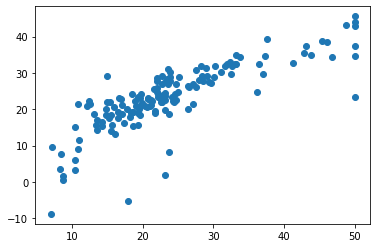

In [8]:
plt.scatter(y_true, y_hat)